# Home assignment 5

Please, rename the Jupyter Notebook that you will submit as ```Surname_assignment5.ipynb```, where instead of ```Surname``` you write your family name. A solution of every problem should be placed below of the corresponding problem statement.

After the running commands (Kernel -> Restart & Run All) all cells in your file have to run correctly. Please check this before submission.

## Problem 1 (4 pts)

- (2 pts) Prove that gradients, computed in two sequential points, generated by the steepest gradient descent, are orthogonal

- (2 pts) Show that for the function $f(x) = x^{\top}x$ the steepest gradient descent converges after one iteration using direct computations

1.

$$\ x_{k+1} = x_k - a_k \nabla f(x_k)$$
We know that a_k is a minimiser of $$F_k(a) = f(x_k - a \nabla f(x_k))$$ due to the fact that we are using steepest gradient descent.

Hence, $$\dfrac{\partial F_k}{\partial a} (a_k) = 0$$

Also, $$ \dfrac{\partial F_k}{\partial a} = \dfrac{\partial F_k}{\partial f} · \dfrac{\partial f}{\partial a} = \nabla f (x_k - a \nabla f(x_k)) · (-\nabla f(x_k)) = \nabla f(x_{k+1}) · (-\nabla f(x_k))$$

Therefore, $$\nabla f(x_{k+1}) · (-\nabla f(x_k)) = 0$$

So, $$x_k, \ x_{k+1}$$ are orthogonal

2. $$f(x) = x^Tx$$
$$x_{k+1} = x_k - a_k \nabla f(x_k)$$

$$\nabla f(x_0) = 2x_0$$

$$F_k(a) = f(x_k - a \nabla f(x_k))$$

$F_k(a_0) = x_0 - 2a_0x_0$ is minimised when $a_0 = 0.5$, thus $F_k(a_0) = x_0 - x_0 = 0$

Therefore, $x_{k+1} = x_0 - 2 \cdotp 0.5 \cdotp x_0 = 0$, so Gradient Descent converged after single iteration

## Problem 2 (10 pts)

- (6 pts) Solve the foloowing problem with the steepest gradient descent method

$$
\frac{1}{2}x^{\top}Ax - b^{\top}x \to \min_x
$$

where 

$$
A = 
\begin{bmatrix}
0.78 & −0.02 & −0.12 & −0.14\\
−0.02 & 0.86 & −0.04 & 0.06 \\
−0.12 & −0.04 & 0.72 & −0.08\\
−0.14 & 0.06 & −0.08 & 0.74
\end{bmatrix}
\qquad
b = \begin{bmatrix}
0.76\\
0.08\\
1.12\\
0.68
\end{bmatrix}
$$

and initial guess $x^0 = 0$ with tolerance of the gradient norm equal to $10^{-6}$. 

- (2 pts) Make convergence plot in terms of the decreasing of gradient norm and make a conclusion on the convergence speed 
- (2 pts) Find spectrum of the matrix $A$ with a proper ```numpy``` function and compare the derived convergence plot with theoretical upper bound. How is the theoretical upper bound tight?

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def GradientDescent(f, gradf, x0, epsilon, num_iter, alpha = None):
    x = x0.copy()
    iteration = 0

    norms = list()

    computeAlpha = alpha is None

    while True:
        gradient = gradf(x)

        if (computeAlpha):
          alpha = (gradient.T @ gradient) / (gradient.T @ A @ gradient)
        
        x -= alpha * gradient

        iteration += 1

        norm = np.linalg.norm(gradf(x))

        norms.append(norm)

        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x)), "norms": norms}
    return res

In [3]:
# Your solution is here

A = np.array([[0.78, -0.02, -0.12, -0.14], [-0.02, 0.86, -0.04, 0.06], [-0.12, -0.04, 0.72, -0.08], [-0.14, 0.06, -0.08, 0.74]])
b = np.array([0.76, 0.08, 1.12, 0.68])

f = lambda x: 0.5 * x.T @ A @ x - b.T @ x

gradf = lambda x: A @ x - b

x0 = np.zeros((A.shape[0]))
epsilon = 1e-6

numIter = 10000

res = GradientDescent(f, gradf, x0, epsilon, numIter)

print(f"x = {res['x']}, numIter = {res['num_iter']}, tolerance = {res['tol']}")

x = [1.53496492 0.12200972 1.97515601 1.4129552 ], numIter = 10, tolerance = 3.2595863202096407e-07


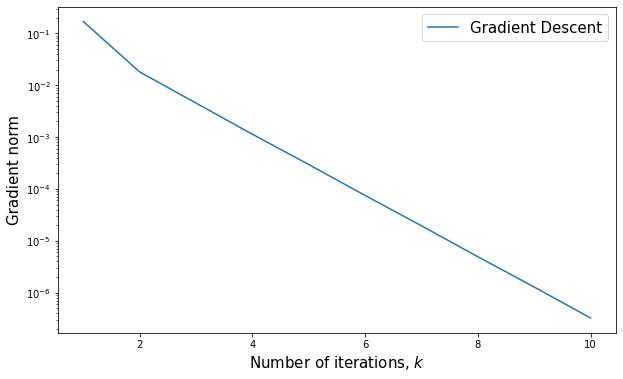

In [4]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, len(res['norms']) + 1), res['norms'], label="Gradient Descent")
plt.xlabel(r"Number of iterations, $k$", fontsize=15)
plt.ylabel("Gradient norm", fontsize=15)
plt.yscale("log")
plt.legend(loc="best", fontsize=15)

So the convergence of GD is linear in log-scale.

In [5]:
eigA = np.linalg.eig(A)
condA = max(eigA[0]) / min(eigA[0])

# condA = np.linalg.cond(A)

convergenceFactor = (condA - 1) / (condA + 1)

print(f"Condition number of matrix A is {condA}, convergence factor for Gradient Descent = {convergenceFactor}")

Condition number of matrix A is 1.807692307692305, convergence factor for Gradient Descent = 0.2876712328767117


In [6]:
res2 = GradientDescent(f, gradf, x0, epsilon, numIter, alpha=convergenceFactor)

print(f"x = {res2['x']}, numIter = {res2['num_iter']}, tolerance = {res2['tol']}")

x = [1.53496398 0.12200957 1.97515537 1.41295441], numIter = 88, tolerance = 9.48457721239468e-07


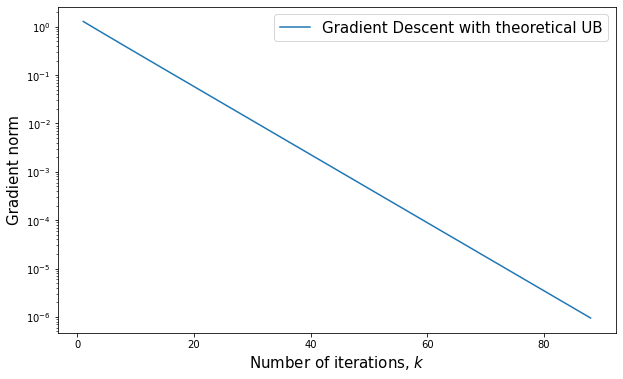

In [7]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, len(res2['norms']) + 1), res2['norms'], label="Gradient Descent with theoretical UB")
plt.xlabel(r"Number of iterations, $k$", fontsize=15)
plt.ylabel("Gradient norm", fontsize=15)
plt.yscale("log")
plt.legend(loc="best", fontsize=15)

Hence, the theoretical upper bound is not tight, we did 78 more iterations with alpha = convergenceFactor

## Problem 3 (16 pts)

- (1 pts) Consider the simple binary classification problem of data taken with [this utility](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). So the first step in this problem is downlowding the dataset and derive matrix $X \in \mathbb{R}^{m \times n}$ of given data and vector $y \in \mathbb{R}^m$ of labels. 
- Now to train the simple logistic regression model you need to solve the following optimization problem

$$ -\frac{1}{m} \sum_{i=1}^m (y_i \log(h(w, b | x_i)) + (1 - y_i)\log(1 - h(w, b | x_i))) \to \min_{w, b},$$

where $y_i$ is an $i$-th label, $x_i$ is an $i$-th row of the matrix $X$, $h(w, b | x_i) = \sigma(w^{\top}x_i + b)$ (here we use $x_i$ as a column vector) and $\sigma(z) = \frac{1}{1 + e^{-z}}$. This problem has two parameter $w \in \mathbb{R}^n$ and $b \in \mathbb{R}$. It is possible to incorporate them in the single vector, so if you want, you can consider them as a components of the single vector.
    
The explanation of the form of the objective function and related topics on how to measure the quality of the trained model will be discussed in the machine learning course.

- (5 pts) Implement the gradient of this objective function and compare your implementation with automatically computed gradient in JAX. Loops are prohibited in your implementation!
- (5 pts) Consider four constant step sizes $10^{-3}, 10^{-2}, 10^{-1}, 1$ and compare the convergence of the gradient descent for them. Also fix the initialization in every run. You should get three convergence plots and analyze them.
- (3 pts) Compare the obtained results with the results if Armijo rule to adapt the step size is used. Provide convergence plots and running time in seconds in all experiments.
-  (2 pts) Make a conclusion on the gain that can be established by the proper adaptive step size selection rules 


In [8]:
# Your solution is here
from sklearn.datasets import load_breast_cancer
import numpy as np

import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

import time

key = random.PRNGKey(0)

In [9]:
X, y = load_breast_cancer(return_X_y=True)

# Normalizing
X /= np.max(X, axis=0)

np.random.seed(1)

m = X.shape[0]

In [10]:
X = np.c_[ X, np.ones(m) ]
w = np.random.randn(X.shape[1])

print(X.shape)
print(w.shape)
print(y.shape)

(569, 31)
(31,)
(569,)


In [11]:
Xjax = jnp.asarray(X)
wjax = jnp.asarray(w)
yjax = jnp.asarray(y)

print(Xjax.shape)
print(wjax.shape)
print(yjax.shape)

(569, 31)
(31,)
(569,)


In [12]:
def Sigmoid(z):
  return 1 / (1 + np.exp(-z))

def Gradient(X, y, w):
  return (-1/m) * X.T @ (y - Sigmoid(X @ w))

def F(X, y, w):
  sigmoid = Sigmoid(X @ w)
  return (-1/m) * np.sum(y * np.log(sigmoid) + (1 - y) * np.log(1 - sigmoid))

In [13]:
@jit
def SigmoidJax(z):
  return 1 / (1 + jnp.exp(-z))

@jit
def FJax(X, y, w):
  sigmoid = SigmoidJax(X @ w)
  return (-1/m) * jnp.sum(y * jnp.log(sigmoid) + (1 - y) * jnp.log(1 - sigmoid))

In [14]:
jaxGrad = grad(FJax, argnums=2)(Xjax, yjax , wjax)

In [15]:
myGrad = Gradient(X, y, w)

In [16]:
print(f"Difference between my grad and jax grad in values = {jnp.linalg.norm(jaxGrad - myGrad)}")

%timeit grad(FJax, argnums=2)(Xjax, yjax , wjax).block_until_ready()
%timeit Gradient(X, y, w)

Difference between my grad and jax grad in values = 1.3684625344012602e-07
100 loops, best of 5: 2.11 ms per loop
The slowest run took 16.51 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 68.6 µs per loop


Therefore, Jax grad function is slower than manual gradient derivation by approximately 30 times

In [17]:
def GradientDescent3(gradf, X, y, w, epsilon, numIter, alpha):
    w = w.copy()
    iteration = 0

    values = list()

    while True:
        gradient = gradf(X, y, w)

        w -= alpha * gradient

        iteration += 1

        value = np.linalg.norm(gradient)

        values.append(value)

        if value < epsilon:
            break
        if iteration >= numIter:
            break

    res = {"w": w, "numIter": iteration, "tol": np.linalg.norm(gradient), "values": values}
    return res

In [18]:
gradValues = list()

alphas = [1e-3, 1e-2, 1e-1, 1]

epsilon = 1e-3

numIter = 10000

for alpha in alphas:
  res = GradientDescent3(Gradient, X, y, w, epsilon, numIter, alpha)

  gradValues.append(res['values'])
  
  print(f"Alpha {alpha} checked. Num iterations = {res['numIter']}, reached tolerance = {res['tol']}")

Alpha 0.001 checked. Num iterations = 10000, reached tolerance = 0.09784137047373898
Alpha 0.01 checked. Num iterations = 10000, reached tolerance = 0.028180149949752785
Alpha 0.1 checked. Num iterations = 10000, reached tolerance = 0.006109080119857051
Alpha 1 checked. Num iterations = 10000, reached tolerance = 0.0011720871626602883


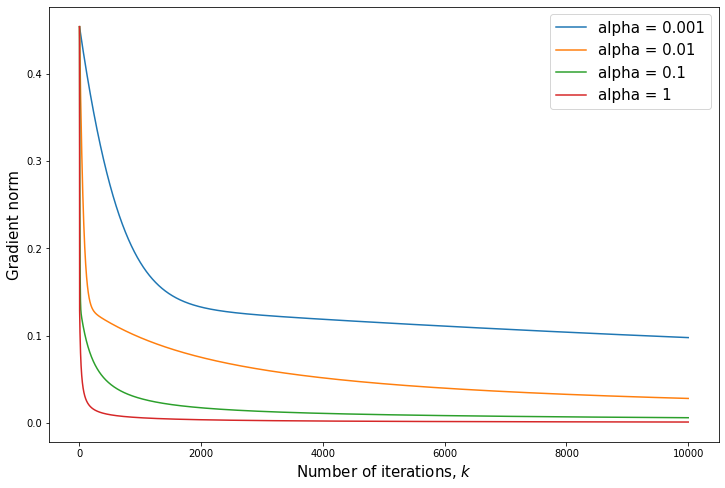

In [19]:
plt.figure(figsize=(12,8))
for alpha, val in zip(alphas, gradValues):
  plt.plot(np.arange(1, len(val) + 1), val, label=f"alpha = {alpha}")
  plt.xlabel(r"Number of iterations, $k$", fontsize=15)
  plt.ylabel(f"Gradient norm", fontsize=15)
  plt.legend(loc=1, fontsize=15)

plt.show()
  

So, Gradient descent converges a lot faster for bigger alphas. The fastest convergence is observed for alpha = 1.

In [20]:
alphasArmijo = np.linspace(1e-3, 1, 5)
betasArmijo = np.linspace(0.1, 3, 5, endpoint=False)

In [21]:
print(alphasArmijo)

[0.001   0.25075 0.5005  0.75025 1.     ]


In [22]:
betasArmijo

array([0.1 , 0.68, 1.26, 1.84, 2.42])

In [23]:
def GradientDescentArmijo(gradf, X, y, w, epsilon, numIter, alpha, beta):
  w = w.copy()
  iteration = 0

  values = list()

  start = time.time()

  while True:
    gradient = gradf(X, y, w)
    negGradient = -gradient

    nextW = w - alpha * gradient

    if (F(X, y, nextW) > F(X, y, w) + beta * alpha * (negGradient.T @ gradient)):
      # print(f"GradientDescentArmijo: alpha = {alpha}, beta = {beta} did not work")
      return False

    w -= alpha * gradient

    iteration += 1

    value = np.linalg.norm(gradient)

    values.append(value)

    if value < epsilon:
        break
    if iteration >= numIter:
        break

  end = time.time()

  res = {"w": w, "tol": np.linalg.norm(gradient), "values": values, "alpha": alpha, "beta": beta, "time": (end-start) * 1000}
  return res

In [24]:
numIter = 10000
epsilon = 1e-3

infoRuns = list()

for alpha in alphasArmijo:
  for beta in betasArmijo:
    res = GradientDescentArmijo(Gradient, X, y, w, epsilon, numIter, alpha, beta)

    if (res):
      print(f"GradientDescentArmijo: alpha = {alpha}, beta = {beta} succeeded. Running time = {res['time']} ms")
      infoRuns.append(res)
    

GradientDescentArmijo: alpha = 0.001, beta = 0.1 succeeded. Running time = 3772.2115516662598 ms
GradientDescentArmijo: alpha = 0.001, beta = 0.6799999999999999 succeeded. Running time = 3625.845432281494 ms
GradientDescentArmijo: alpha = 0.25075, beta = 0.1 succeeded. Running time = 3665.104389190674 ms
GradientDescentArmijo: alpha = 0.25075, beta = 0.6799999999999999 succeeded. Running time = 3700.0739574432373 ms
GradientDescentArmijo: alpha = 0.5005, beta = 0.1 succeeded. Running time = 3647.103786468506 ms
GradientDescentArmijo: alpha = 0.5005, beta = 0.6799999999999999 succeeded. Running time = 3630.61261177063 ms
GradientDescentArmijo: alpha = 0.75025, beta = 0.1 succeeded. Running time = 3634.028434753418 ms
GradientDescentArmijo: alpha = 1.0, beta = 0.1 succeeded. Running time = 3638.577461242676 ms


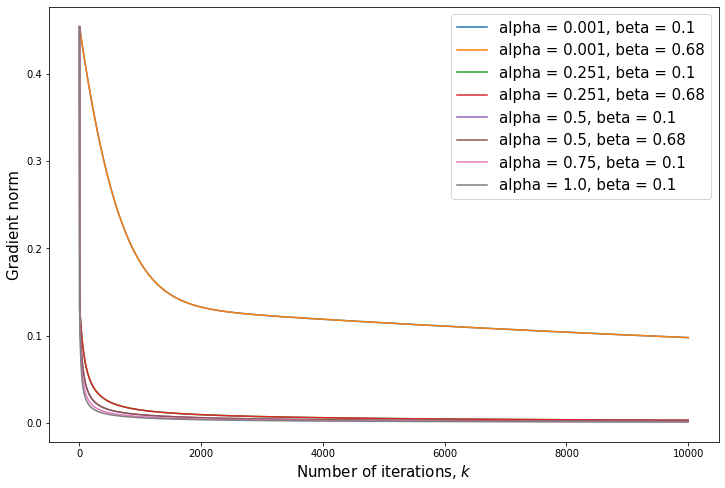

In [25]:
plt.figure(figsize=(12,8))
for run in infoRuns:
  alpha = round(run['alpha'], 3)
  beta = round(run['beta'], 2)
  values = run['values']
  plt.plot(np.arange(1, len(values) + 1), values, label=f"alpha = {alpha}, beta = {beta}")
  plt.xlabel(r"Number of iterations, $k$", fontsize=15)
  plt.ylabel(f"Gradient norm", fontsize=15)
  plt.legend(loc=1, fontsize=15)

plt.show()

So, in general with Armijo rule, the convergence is faster than with other methods for most of alphas and betas tested

In conclusion, adaptive step size is very important as the convergence can be increased substantially.

Also, selecting a correct scheme for step size allows to get more accurate results (faster)